In [ ]:
pip install "pulp==2.1"

In [ ]:
from utils import *
from MySolution_10 import MyClassifier, MyClassifier_v2, MyClustering, MyLabelSelection
import numpy as np
# Import scikit learn to find centroids
from sklearn.cluster import KMeans

Synthetic data shape:  (1000, 2) (1000,)


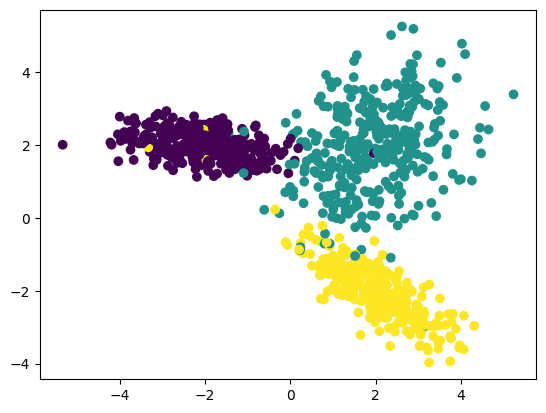

In [ ]:
# Get datasets
syn_data = prepare_synthetic_data()
print("Synthetic data shape: ", syn_data['trainX'].shape, syn_data['trainY'].shape)

plt.scatter(syn_data['trainX'][:, 0], syn_data['trainX'][:, 1], c=syn_data['trainY'])

MNIST data shape:  (1000, 784) (1000,)


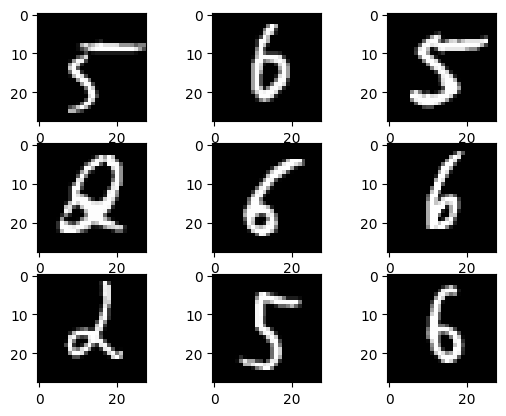

In [ ]:
mnist_data = prepare_mnist_data()
print("MNIST data shape: ", mnist_data['trainX'].shape, mnist_data['trainY'].shape)

for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(mnist_data['trainX'][i].reshape(28,28), cmap='gray')
plt.show()

# TASK1

/usr/local/lib/python3.10/dist-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


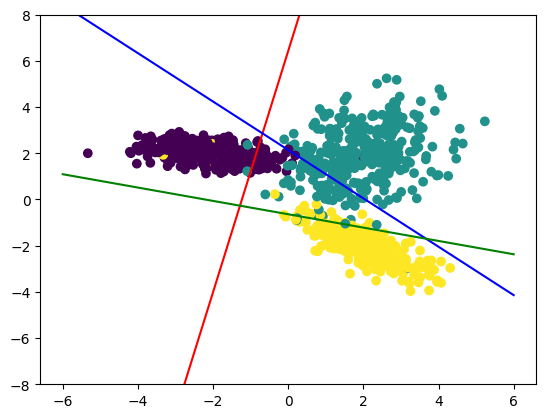

0.972


In [ ]:
K = 3
Classifier = MyClassifier_v2(K)
Classifier.train(syn_data['trainX'],syn_data['trainY'])
plt.scatter(syn_data['trainX'][:, 0], syn_data['trainX'][:, 1], c=syn_data['trainY'])

x = np.linspace(-6,6,100)
# hyperplane 1
y1 = -1/Classifier.w[0][1]*(Classifier.w[0][0] * x + Classifier.b[0]-1)
# hyperplane 2
y2 = -1/Classifier.w[1][1]*(Classifier.w[1][0] * x + Classifier.b[1]-1)
# hyperplane 3
y3 = -1/Classifier.w[2][1]*(Classifier.w[2][0] * x + Classifier.b[2]-1)
plt.plot(x,y1, 'r')
plt.plot(x,y2, 'b')
plt.plot(x,y3, 'g')
plt.ylim((-8, 8))
plt.show()

synthetic_test_accuracy = Classifier.evaluate(syn_data['testX'],syn_data['testY'])
print(synthetic_test_accuracy)

In [ ]:
K = 3
Classifier = MyClassifier_v2(K)
Classifier.train(mnist_data['trainX'],mnist_data['trainY'])

mnist_test_accuracy = Classifier.evaluate(mnist_data['testX'],mnist_data['testY'])
print(mnist_test_accuracy)

0.834


/usr/local/lib/python3.10/dist-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


# TASK2

## 1. Synthetic Data

### 1) Clustering and NMI

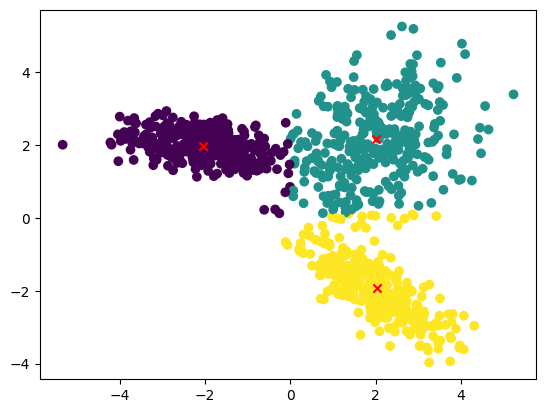

In [ ]:
# result
syn_clustering_nmi = np.zeros(3)

# train clustering K = 3
syn_clustering_3 = MyClustering(3)
syn_clustering_3.train(syn_data['trainX'])
plt.scatter(syn_data['trainX'][:, 0], syn_data['trainX'][:, 1], c=syn_clustering_3.labels)
plt.scatter(syn_clustering_3.cluster_centers_[:, 0],syn_clustering_3.cluster_centers_[:, 1], color='red', marker='x')
syn_clustering_nmi[0] = syn_clustering_3.evaluate_clustering(syn_data['trainY'])

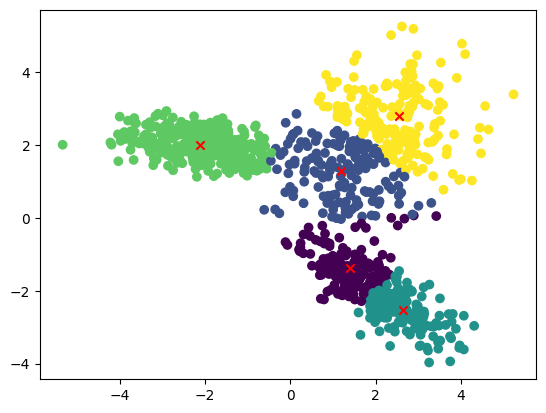

In [ ]:
# train clustering K = 5
syn_clustering_5 = MyClustering(5)
syn_clustering_5.train(syn_data['trainX'])
plt.scatter(syn_data['trainX'][:, 0], syn_data['trainX'][:, 1], c=syn_clustering_5.labels)
plt.scatter(syn_clustering_5.cluster_centers_[:, 0],syn_clustering_5.cluster_centers_[:, 1], color='red', marker='x')
syn_clustering_nmi[1] = syn_clustering_5.evaluate_clustering(syn_data['trainY'])

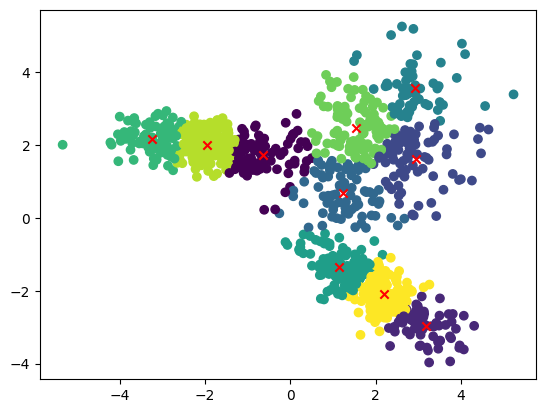

In [ ]:
# train clustering K = 10
syn_clustering_10 = MyClustering(10)
syn_clustering_10.train(syn_data['trainX'])
plt.scatter(syn_data['trainX'][:, 0], syn_data['trainX'][:, 1], c=syn_clustering_10.labels)
plt.scatter(syn_clustering_10.cluster_centers_[:, 0],syn_clustering_10.cluster_centers_[:, 1], color='red', marker='x')
syn_clustering_nmi[2] = syn_clustering_10.evaluate_clustering(syn_data['trainY'])

### 2) Classification and Accuracy

In [ ]:
# result
syn_classification_accuracy = np.zeros(3)

syn_classification_accuracy[0] = syn_clustering_3.evaluate_classification(syn_data['trainY'], syn_data['testX'], syn_data['testY'])
syn_classification_accuracy[1] = syn_clustering_5.evaluate_classification(syn_data['trainY'], syn_data['testX'], syn_data['testY'])
#syn_classification_accuracy[2] = syn_clustering_10.evaluate_classification(syn_data['trainY'], syn_data['testX'], syn_data['testY'])

## 2. MNIST Data

## 1) Clustering and NMI

In [ ]:
# result
mnist_clustering_nmi = np.zeros(3)

# train clustering K = 3
mnist_clustering_3 = MyClustering(3)
mnist_clustering_3.train(mnist_data['trainX'])
mnist_clustering_nmi[0] = mnist_clustering_3.evaluate_clustering(mnist_data['trainY'])

In [ ]:
# train clustering K = 10
mnist_clustering_10 = MyClustering(10)
mnist_clustering_10.train(mnist_data['trainX'])
mnist_clustering_nmi[1] = mnist_clustering_10.evaluate_clustering(mnist_data['trainY'])

In [ ]:
# train clustering K = 32
mnist_clustering_32 = MyClustering(32)
mnist_clustering_32.train(mnist_data['trainX'])
mnist_clustering_nmi[2] = mnist_clustering_32.evaluate_clustering(mnist_data['trainY'])

## 2) Classification and Accuracy

In [ ]:
# result
mnist_classification_accuracy = np.zeros(3)

mnist_classification_accuracy[0] = mnist_clustering_3.evaluate_classification(mnist_data['trainY'], mnist_data['testX'], mnist_data['testY'])
#mnist_classification_accuracy[1] = mnist_clustering_10.evaluate_classification(mnist_data['trainY'], mnist_data['testX'], mnist_data['testY'])
#mnist_classification_accuracy[2] = mnist_clustering_32.evaluate_classification(mnist_data['trainY'], mnist_data['testX'], mnist_data['testY'])

# TASK3

In [ ]:
ratio_list = [0.05, 0.1, 0.2, 0.5, 1]


kmeans_syn = KMeans(n_clusters=3)
kmeans_mnist = KMeans(n_clusters=3)

# Fit the model to your data
kmeans_syn.fit(syn_data['trainX'])
kmeans_mnist.fit(mnist_data['trainX'])

# Get the centroids
centroids_syn = kmeans_syn.cluster_centers_
centroids_mnist = kmeans_mnist.cluster_centers_

indices_syn = []
indices_mnist = []

for ratio in ratio_list:
    print(ratio)
    # Synthetic
    task3_syn = MyLabelSelection(ratio, centroids_syn)
    syn_idx = task3_syn.select(syn_data['trainX'])
    indices_syn.append(syn_idx)
    # mnist
    task3_mnist = MyLabelSelection(ratio, centroids_mnist)
    mnist_idx = task3_mnist.select(mnist_data['trainX'])
    indices_mnist.append(mnist_idx)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.05
0.1
0.2
0.5
1


In [ ]:
synthetic_test_accuracy_ours = np.zeros(len(ratio_list))
synthetic_test_accuracy_rand = np.zeros(len(ratio_list))
mnist_test_accuracy_ours = np.zeros(len(ratio_list))
mnist_test_accuracy_rand = np.zeros(len(ratio_list))

K = 3
for ii in range(len(ratio_list)):
    print(ii)
    Classifier = MyClassifier_v2(K)
    random_indices = np.random.choice(np.arange(1000), int(ratio_list[ii]*1000),False)
    # Synthetic our algo
    Classifier.train(syn_data['trainX'][indices_syn[ii]],syn_data['trainY'][indices_syn[ii]])
    synthetic_test_accuracy_ours[ii] = Classifier.evaluate(syn_data['testX'],syn_data['testY'])
    # Synthetic random
    Classifier.train(syn_data['trainX'][random_indices],syn_data['trainY'][random_indices])
    synthetic_test_accuracy_rand[ii] = Classifier.evaluate(syn_data['testX'],syn_data['testY'])
    # mnist our algo
    Classifier.train(mnist_data['trainX'][indices_mnist[ii]],mnist_data['trainY'][indices_mnist[ii]])
    mnist_test_accuracy_ours[ii] = Classifier.evaluate(mnist_data['testX'],mnist_data['testY'])
    # mnist random
    Classifier.train(mnist_data['trainX'][random_indices],mnist_data['trainY'][random_indices])
    mnist_test_accuracy_rand[ii] = Classifier.evaluate(mnist_data['testX'],mnist_data['testY'])

0


/usr/local/lib/python3.10/dist-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


1


/usr/local/lib/python3.10/dist-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/cvxpy/problems/problem.py:1387: UserWarn

2


/usr/local/lib/python3.10/dist-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


3


/usr/local/lib/python3.10/dist-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


4


/usr/local/lib/python3.10/dist-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


# RESULT SUMMARY

In [ ]:
## TODO: Implement your solution and store the results in the following dictionaries
## Please note that the below values are given as an example to show the format,
## you need to replace them with your values :)

result1 = {'synthetic_test_accuracy':synthetic_test_accuracy, 'mnist_test_accuracy':mnist_test_accuracy}

result2 = {'synthetic':{'K':[3, 5, 10], 'clustering_nmi':syn_clustering_nmi, 'classification_accuracy':syn_classification_accuracy},
            'mnist':{'K':[3, 10, 32], 'clustering_nmi':mnist_clustering_nmi, 'classification_accuracy':mnist_classification_accuracy}}

result3 = {'synthetic': {'label_percentage':[0.05,0.1,0.2,0.5,1], 'test_accuracy(our algo)':synthetic_test_accuracy_ours, 'test_accuracy(random)':synthetic_test_accuracy_rand},
            'mnist': {'label_percentage':[0.05,0.1,0.2,0.5,1], 'test_accuracy(our algo)':mnist_test_accuracy_ours, 'test_accuracy(random)':mnist_test_accuracy_rand}}


plot_result(result1, result2, result3)

NameError: ignored

In [ ]:
result1

In [ ]:
result2

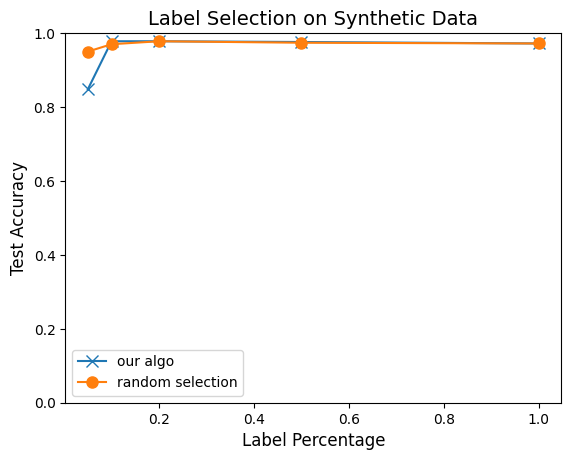

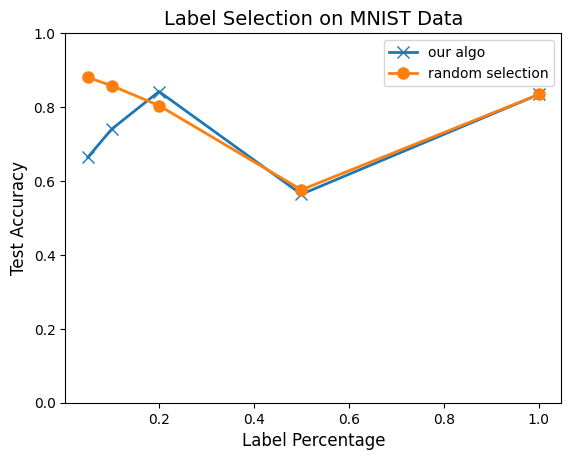

In [ ]:
result3 = {'synthetic': {'label_percentage':[0.05,0.1,0.2,0.5,1], 'test_accuracy(our algo)':synthetic_test_accuracy_ours, 'test_accuracy(random)':synthetic_test_accuracy_rand},
            'mnist': {'label_percentage':[0.05,0.1,0.2,0.5,1], 'test_accuracy(our algo)':mnist_test_accuracy_ours, 'test_accuracy(random)':mnist_test_accuracy_rand}}
plot_result(result3 = result3)

## **Task-4**

Q1.

In [ ]:
# Supervised learning:
K = 3
Classifier = MyClassifier_v2(K)

syn_train_X = syn_data['trainX']
syn_train_Y = syn_data['trainY']
mnist_train_X = mnist_data['trainX']
mnist_train_Y = mnist_data['trainY']

In [ ]:
# for 250 input points:
Classifier.train(syn_train_X[:250], syn_train_Y[:250])
synthetic_test_accuracy = Classifier.evaluate(syn_data['testX'],syn_data['testY'])
print("Synthetic test accuracy for 250 input points is:" + str(synthetic_test_accuracy))
# for 500 input points:
Classifier.train(syn_train_X[:500], syn_train_Y[:500])
synthetic_test_accuracy = Classifier.evaluate(syn_data['testX'],syn_data['testY'])
print("Synthetic test accuracy for 500 input points is:" + str(synthetic_test_accuracy))
# for 750 input points:
Classifier.train(syn_train_X[:750], syn_train_Y[:750])
synthetic_test_accuracy = Classifier.evaluate(syn_data['testX'],syn_data['testY'])
print("Synthetic test accuracy for 750 input points is:" + str(synthetic_test_accuracy))

                                     CVXPY                                     
                                     v1.3.2                                    
(CVXPY) Nov 30 10:54:33 PM: Your problem has 609 variables, 4 constraints, and 0 parameters.
(CVXPY) Nov 30 10:54:33 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Nov 30 10:54:33 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Nov 30 10:54:33 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Nov 30 10:54:33 PM: Compiling problem (target solver=ECOS).
(CVXPY) Nov 30 10:54:33 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -

/usr/local/lib/python3.10/dist-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
(CVXPY) Nov 30 10:54:34 PM: Problem status: optimal_inaccurate
(CVXPY) Nov 30 10:54:34 PM: Optimal value: 9.603e+01
(CVXPY) Nov 30 10:54:34 PM: Compilation took 1.018e-01 seconds
(CVXPY) Nov 30 10:54:34 PM: Solver (including time spent in interface) took 2.896e-01 seconds
Synthetic test accuracy for 500 input points is:0.974
                                     CVXPY                                     
                                     v1.3.2                                    
(CVXPY) Nov 30 10:54:34 PM: Your problem has 4509 variables, 4 constraints, and 0 parameters.
(CVXPY) Nov 30 10:54:34 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Nov 30 10:54:34 PM: (If you need to solve this problem multiple times, but with differen

/usr/local/lib/python3.10/dist-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
(CVXPY) Nov 30 10:54:35 PM: Problem status: optimal_inaccurate
(CVXPY) Nov 30 10:54:35 PM: Optimal value: 1.625e+02
(CVXPY) Nov 30 10:54:35 PM: Compilation took 9.437e-02 seconds
(CVXPY) Nov 30 10:54:35 PM: Solver (including time spent in interface) took 1.131e+00 seconds
Synthetic test accuracy for 750 input points is:0.972


/usr/local/lib/python3.10/dist-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


In [ ]:
syn_trainX_new = np.concatenate((syn_train_X, (syn_data['testX'])[:200]))
syn_trainY_new = np.concatenate((syn_train_Y, (syn_data['testY'])[:200]))
Classifier.train(syn_trainX_new, syn_trainY_new)
synthetic_test_accuracy = Classifier.evaluate(syn_data['testX'],syn_data['testY'])
print("Synthetic test accuracy for 1200 input points is:" + str(synthetic_test_accuracy))


                                     CVXPY                                     
                                     v1.3.2                                    
(CVXPY) Nov 30 11:02:19 PM: Your problem has 7209 variables, 4 constraints, and 0 parameters.
(CVXPY) Nov 30 11:02:19 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Nov 30 11:02:19 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Nov 30 11:02:19 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Nov 30 11:02:19 PM: Compiling problem (target solver=ECOS).
(CVXPY) Nov 30 11:02:19 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing 

/usr/local/lib/python3.10/dist-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


In [ ]:
# for 250 input points:
Classifier.train(mnist_train_X[:250], mnist_train_Y[:250])
mnist_test_accuracy = Classifier.evaluate(mnist_data['testX'],mnist_data['testY'])
print("Synthetic test accuracy for 250 input points is:" + str(mnist_test_accuracy))
# for 500 input points:
Classifier.train(mnist_train_X[:500], mnist_train_Y[:500])
mnist_test_accuracy = Classifier.evaluate(mnist_data['testX'],mnist_data['testY'])
print("Synthetic test accuracy for 500 input points is:" + str(mnist_test_accuracy))
# for 750 input points:
Classifier.train(mnist_train_X[:750], mnist_train_Y[:750])
mnist_test_accuracy = Classifier.evaluate(mnist_data['testX'],mnist_data['testY'])
print("Synthetic test accuracy for 750 input points is:" + str(mnist_test_accuracy))

                                     CVXPY                                     
                                     v1.3.2                                    
(CVXPY) Nov 30 11:16:03 PM: Your problem has 8355 variables, 4 constraints, and 0 parameters.
(CVXPY) Nov 30 11:16:03 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Nov 30 11:16:03 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Nov 30 11:16:03 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Nov 30 11:16:03 PM: Compiling problem (target solver=ECOS).
(CVXPY) Nov 30 11:16:03 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing 

/usr/local/lib/python3.10/dist-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


In [ ]:
mnist_trainX_new = np.concatenate((mnist_train_X, (mnist_data['testX'])[:200]))
mnist_trainY_new = np.concatenate((mnist_train_Y, (mnist_data['testY'])[:200]))
Classifier.train(mnist_trainX_new, mnist_trainY_new)
mnist_test_accuracy = Classifier.evaluate(mnist_data['testX'],mnist_data['testY'])
print("Synthetic test accuracy for 1200 input points is:" + str(mnist_test_accuracy))

                                     CVXPY                                     
                                     v1.3.2                                    
(CVXPY) Nov 30 11:04:58 PM: Your problem has 9555 variables, 4 constraints, and 0 parameters.
(CVXPY) Nov 30 11:04:58 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Nov 30 11:04:58 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Nov 30 11:04:58 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Nov 30 11:04:58 PM: Compiling problem (target solver=ECOS).
(CVXPY) Nov 30 11:04:58 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing 

/usr/local/lib/python3.10/dist-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Q1. and Q2.

In [ ]:
# unsupervised learning
# train clustering K = 3
syn_clustering_3 = MyClustering(3)

# syn_clustering_3.train(syn_trainX_new)
syn_clustering_3.train(syn_train_X[:50])

# syn_classification_acc = syn_clustering_3.evaluate_classification(syn_trainY_new, syn_data['testX'], syn_data['testY'])
# syn_clustering_acc = syn_clustering_3.evaluate_clustering(syn_trainY_new)
syn_classification_acc = syn_clustering_3.evaluate_classification(syn_train_Y[:50], syn_data['testX'], syn_data['testY'])
syn_clustering_acc = syn_clustering_3.evaluate_clustering(syn_train_Y[:50])

print(syn_classification_acc)
print(syn_clustering_acc)



0.968
0.9208146230211113


In [ ]:
# train clustering K = 3
mnist_clustering_3 = MyClustering(3)

# mnist_clustering_3.train(mnist_trainX_new)
mnist_clustering_3.train(mnist_train_X[:50])

# mnist_classification_acc = mnist_clustering_3.evaluate_classification(mnist_trainY_new, mnist_data['testX'], mnist_data['testY'])
# mnist_clustering_acc = mnist_clustering_3.evaluate_clustering(mnist_trainY_new)
mnist_classification_acc = mnist_clustering_3.evaluate_classification(mnist_train_Y[:50], mnist_data['testX'], mnist_data['testY'])
mnist_clustering_acc = mnist_clustering_3.evaluate_clustering(mnist_train_Y[:50])

print(mnist_classification_acc)
print(mnist_clustering_acc)


0.546
0.2926409828545053


Q3.

In [ ]:
kmeans_syn = KMeans(n_clusters=3)
kmeans_mnist = KMeans(n_clusters=3)

# Fit the model to your data
kmeans_syn.fit(syn_data['trainX'][:10])
kmeans_mnist.fit(mnist_data['trainX'][:10])

# Get the centroids
centroids_syn = kmeans_syn.cluster_centers_
centroids_mnist = kmeans_mnist.cluster_centers_

# # Get cluster centers and labels
# cluster_centers = kmeans.cluster_centers_
labels_syn = kmeans_syn.labels_
labels_mnist = kmeans_mnist.labels_

task4_syn = MyLabelSelection(1, centroids_syn)
# print("!!!!!!!",task4_syn)
syn_idx = task4_syn.select(syn_data['trainX'][:10])
print(syn_idx)

task4_mnist = MyLabelSelection(1, centroids_mnist)
mnist_idx = task4_mnist.select(mnist_data['trainX'][:10])
print(mnist_idx)

# Calculate distances from each point to cluster centers
distance_syn = kmeans_syn.transform(syn_data['trainX'][:10])
distance_mnist = kmeans_mnist.transform(mnist_data['trainX'][:10])
# Calculate probabilities based on distances
probabilities_syn = np.exp(-distance_syn) / np.sum(np.exp(-distance_syn), axis=1)[:, None]
probabilities_mnist = np.exp(-norm_distance_mnist) / np.sum(np.exp(-norm_distance_mnist), axis=1)[:, None]

# Display probabilities for each point and cluster
for i, prob in enumerate(probabilities_syn):
    print(f"Point {i + 1} Probabilities SYNTHETIC: {prob}")

for i, prob in enumerate(probabilities_mnist):
    print(f"Point {i + 1} Probabilities MNSIT: {prob}")

# Display final cluster assignments
print("Final Cluster Assignments:")
for i, label in enumerate(labels_syn):
    print(f"Point {i + 1} assigned to Cluster in syn {label + 1}")
for i, label in enumerate(labels_mnist):
    print(f"Point {i + 1} assigned to Cluster in mnist {label + 1}")

[1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Point 1 Probabilities SYNTHETIC: [0.01098484 0.98210507 0.00691009]
Point 2 Probabilities SYNTHETIC: [7.17804316e-04 5.59984001e-03 9.93682356e-01]
Point 3 Probabilities SYNTHETIC: [0.01020802 0.98421609 0.00557589]
Point 4 Probabilities SYNTHETIC: [9.90269253e-01 9.07767068e-03 6.53076786e-04]
Point 5 Probabilities SYNTHETIC: [0.0173806  0.97069297 0.01192643]
Point 6 Probabilities SYNTHETIC: [0.98173639 0.01612283 0.00214077]
Point 7 Probabilities SYNTHETIC: [9.90070220e-01 9.01117448e-03 9.18605794e-04]
Point 8 Probabilities SYNTHETIC: [0.00310519 0.02888032 0.96801449]
Point 9 Probabilities SYNTHETIC: [6.65413036e-04 5.87424060e-03 9.93460346e-01]
Point 10 Probabilities SYNTHETIC: [0.00694475 0.97907174 0.01398351]
Point 1 Probabilities MNSIT: [nan  0. nan]
Point 2 Probabilities MNSIT: [ 0.  0. nan]
Point 3 Probabilities MNSIT: [nan  0. nan]
Point 4 Probabilities MNSIT: [ 0.  0. nan]
Point 5 Probabilities MNSIT: [nan  0. na